## Data Preprocessing and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('training_sample.csv')
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

There 455401 records and 25 features. 'Ordered' is our target feature which means there are 24 descriptive features.

We can see that all features contain integers. UseID is not necessary for our predictions so we can drop the column.

In [4]:
new_df = df.drop('UserID', axis=1)
new_df.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1


## Data Quality Report

Lets create a data quality report to better understand our data.

In [5]:
# This block of code explores the data by calculating all the
# stats for a Data Quality Report (missing data, cardinalities,
# modes, frequencies, mode percentages)

mis_vals = []
cardinality = []
percent_missing = []
total = len(df)
modes1 = list()
modes2 = list()
freq1 = list()
freq2 = list()
mode1_p = list()
mode2_p = list()

for col in new_df.columns:
    missing = df[col].isnull().sum()
    mis_vals.append(missing)

    card = df[col].nunique()
    cardinality.append(card)

    percent_miss = round((missing/total)*100,2)
    percent_missing.append(percent_miss)

    mode1 = df[col].value_counts().index.tolist()[0]
    modes1.append(mode1)

    mode2 = df[col].value_counts().index.tolist()[1]
    modes2.append(mode2)

    mode1_freq = df[col].value_counts().tolist()[0]
    freq1.append(mode1_freq)

    mode2_freq = df[col].value_counts().tolist()[1]
    freq2.append(mode2_freq)

    mode1_perc = round((mode1_freq/total)*100,2)
    mode1_p.append(mode1_perc)

    mode2_perc = round((mode2_freq/total)*100,2)
    mode2_p.append(mode2_perc)
    

In [6]:
# Inserts data retreived from previous cell into a dataframe

columns = ['Feature', 'Count', '% of Missing', 'Cardinality', 'Mode', 'Mode Frequency', 'Mode %', '2nd Mode', '2nd Mode Frequency', '2nd Mode %']
features = new_df.columns

print("DATA QUALITY REPORT")

dqr = pd.read_csv('dqr_template.csv', names=columns)
for item in dqr:
    for i in range(len(features)):
        if item == 'Feature':
            dqr.loc[i:i,item] = features[i]
        elif item == 'Count':
            dqr.loc[i:i,item] = len(df[features[i]])
        elif item == '% of Missing':
            dqr.loc[i:i,item] = percent_missing[i]
        elif item == 'Cardinality':
            dqr.loc[i:i,item] = cardinality[i]
        elif item == 'Mode':
            dqr.loc[i:i,item] = modes1[i]
        elif item == 'Mode Frequency':
            dqr.loc[i:i,item] = freq1[i]
        elif item == 'Mode %':
            dqr.loc[i:i,item] = mode1_p[i]
        elif item == '2nd Mode':
            dqr.loc[i:i,item] = modes2[i]
        elif item == '2nd Mode Frequency':
            dqr.loc[i:i,item] = freq2[i]
        elif item == '2nd Mode %':
            dqr.loc[i:i,item] = mode2_p[i]
dqr

DATA QUALITY REPORT


,Feature,Count,% of Missing,Cardinality,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %
0,basket_icon_click,455401,0,2,0,410248,90.09,1,45153,9.91
1,basket_add_list,455401,0,2,0,421464,92.55,1,33937,7.45
2,basket_add_detail,455401,0,2,0,403979,88.71,1,51422,11.29
3,sort_by,455401,0,2,0,438620,96.32,1,16781,3.68
4,image_picker,455401,0,2,0,443226,97.33,1,12175,2.67
5,account_page_click,455401,0,2,0,453775,99.64,1,1626,0.36
6,promo_banner_click,455401,0,2,0,448020,98.38,1,7381,1.62
7,detail_wishlist_add,455401,0,2,0,453802,99.65,1,1599,0.35
8,list_size_dropdown,455401,0,2,0,350494,76.96,1,104907,23.04
9,closed_minibasket_click,455401,0,2,0,447533,98.27,1,7868,1.73


Every feature's cardinality is 2 so we know that the value is either 0 or 1, therefore no normalization is needed and no outliers are present.

## Feature Selection

Next, let's try to filter out some unimportant features using the Chi-Square test.

In [7]:
X = new_df.drop(columns='ordered')
y = new_df['ordered']

# Calculate every feature's Chi-value and P-value

chi_scores = chi2(X,y)

chi_scores

(array([7.52682557e+04, 3.48768184e+04, 6.93808424e+04, 1.30931917e+03,
        2.26537987e+03, 1.48878713e+03, 1.43184576e+03, 2.50964113e+02,
        8.40617614e+03, 8.77307552e+03, 2.72258524e+05, 1.59656129e+03,
        1.83811194e+05, 2.10579577e+05, 2.59353867e+01, 4.48252173e+02,
        3.04151149e+02, 8.04875863e+03, 2.67689696e+02, 8.88563693e+02,
        1.13898313e+02, 7.69984766e+02, 3.04483250e+01]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.06669420e-286,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.60050059e-056,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 3.53037795e-007, 1.73178032e-099,
        4.10578356e-068, 0.00000000e+000, 3.61774346e-060, 3.00575781e-195,
        1.37165290e-026, 1.81162860e-169, 3.42879262e-008]))

Lets go ahead and display these values on a graph so we can get a better understanding.

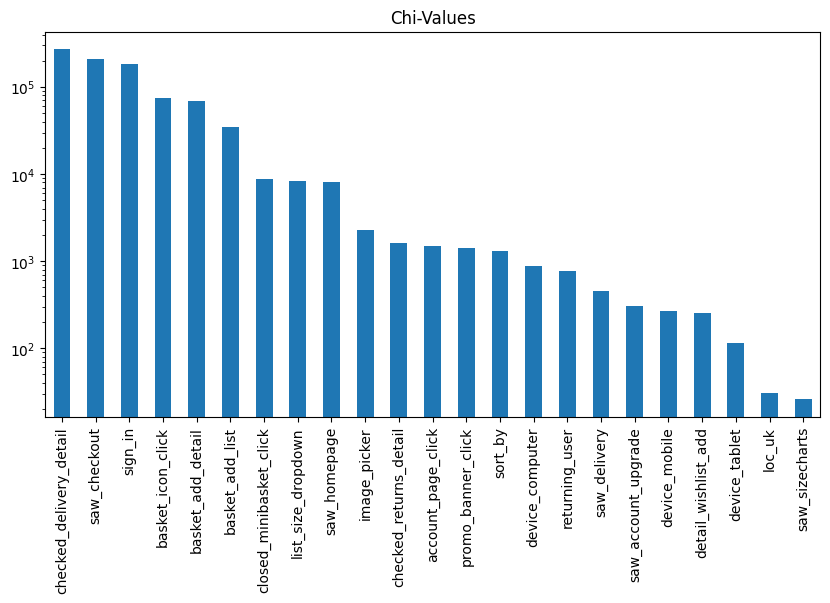

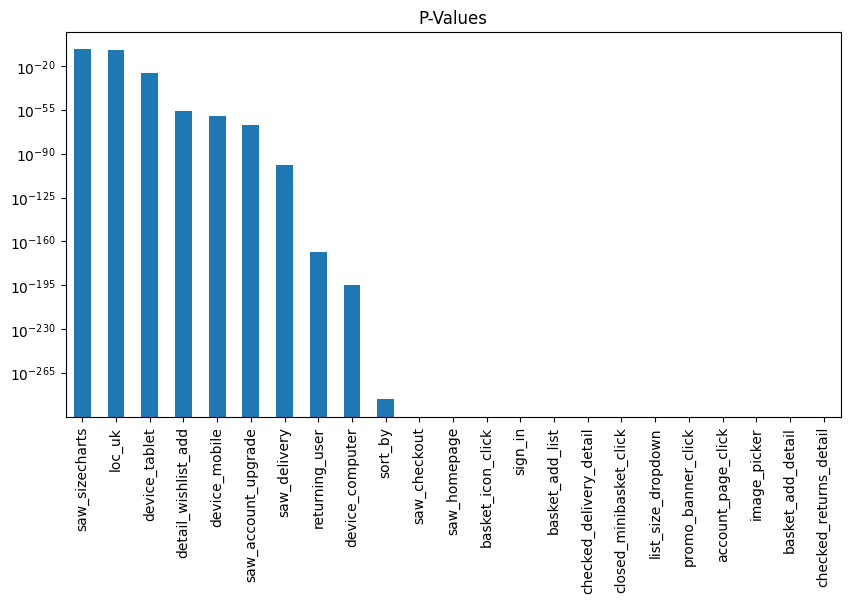

In [8]:
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10,5))
chi_values.plot.bar()
plt.title('Chi-Values')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10,5))
p_values.plot.bar()
plt.title('P-Values')
plt.yscale('log')
plt.show()

We know that higher chi values means higher importance and higher p values means lower importance.

'saw_sizecharts', 'loc_uk' are the top 2 most unimportant features so we will drop these.

The device features ('device_tablet', 'device_computer', 'device_mobile') also scored on the unimportant side, and they don't matter much for what we are trying to build our models upon so we will drop these too.

In [9]:
drop_cols=['saw_sizecharts','loc_uk','device_tablet','device_mobile','device_computer']
new_df = new_df.drop(columns=drop_cols)

In [10]:
new_df.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_delivery,saw_account_upgrade,saw_homepage,returning_user,ordered
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1


A quick look at the number of 0 and 1 values in the 'ordered' column, which is our target feature, shows that there are far more values for 0 (not ordered), then there are for 1 (ordered)

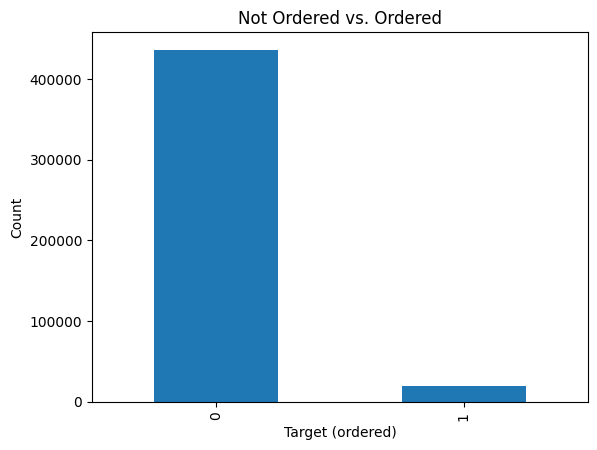

In [11]:
counts = new_df['ordered'].value_counts()
counts.plot.bar()
plt.title("Not Ordered vs. Ordered")
plt.xlabel('Target (ordered)')
plt.ylabel('Count')
plt.show()

Our data is now clean but imbalanced. Therefore, we will undersample our data. We will continue with this portion in the modeling section.

In [12]:
new_df.to_csv('cleaned_data.csv')